## Section 1: Data Preprocessing

Kaggle Dataset Link: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

### Import necessary libraries and load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
#Install Kaggle API
!pip install -q kaggle

In [3]:
#Upload the Kaggle API key to Colab
#Uploaded the json to Colab

#Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
#Disable API Key
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#Import the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

 91% 60.0M/66.0M [00:00<00:00, 148MB/s]
100% 66.0M/66.0M [00:00<00:00, 133MB/s]


In [6]:
#Extract the files
!unzip -q /content/creditcardfraud.zip

### Data Exploration

In [7]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print(f"Row Count for the dataset: ", df.shape[0])
print(f"Column Count for the dataset: ", df.shape[1])

Row Count for the dataset:  284807
Column Count for the dataset:  31


In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Dealing with missing values

In [12]:
#There are no missing values in this dataset
df.isna().values.any()

False

In [13]:
df.isna().values.sum()

0

### Dealing with categorical columns

In [14]:
#There are no categorical columns in this dataset
df.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [15]:
len(df.select_dtypes(include = 'object').columns)

0

### Countplot

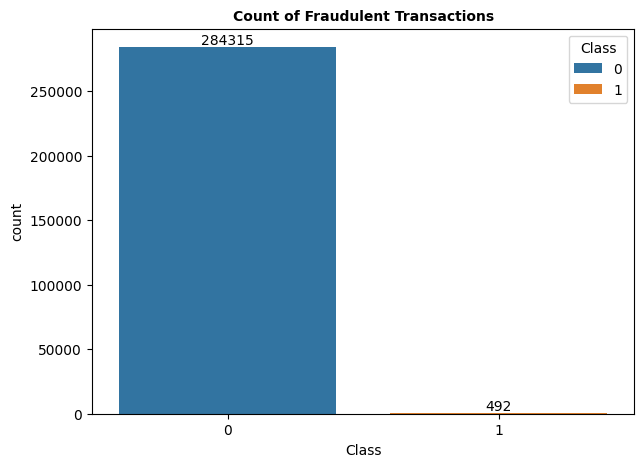

In [16]:
#Countplot of fraudulent transactions
plt.figure(figsize = (7,5))
ax = sns.countplot(x = "Class", data = df, hue = "Class")
for label in ax.containers:
  ax.bar_label(label)
plt.title("Count of Fraudulent Transactions", font = 'sans serif', color = 'black', weight = 'bold')
plt.show()

In [17]:
df['Class'].unique()

array([0, 1])

In [18]:
df['Class'].nunique()

2

In [19]:
countval = df['Class'].value_counts().sort_values(ascending = True)
countval

1       492
0    284315
Name: Class, dtype: int64

### Correlation matrix and heatmap

In [20]:
newdf = df.drop(columns=['Class'])

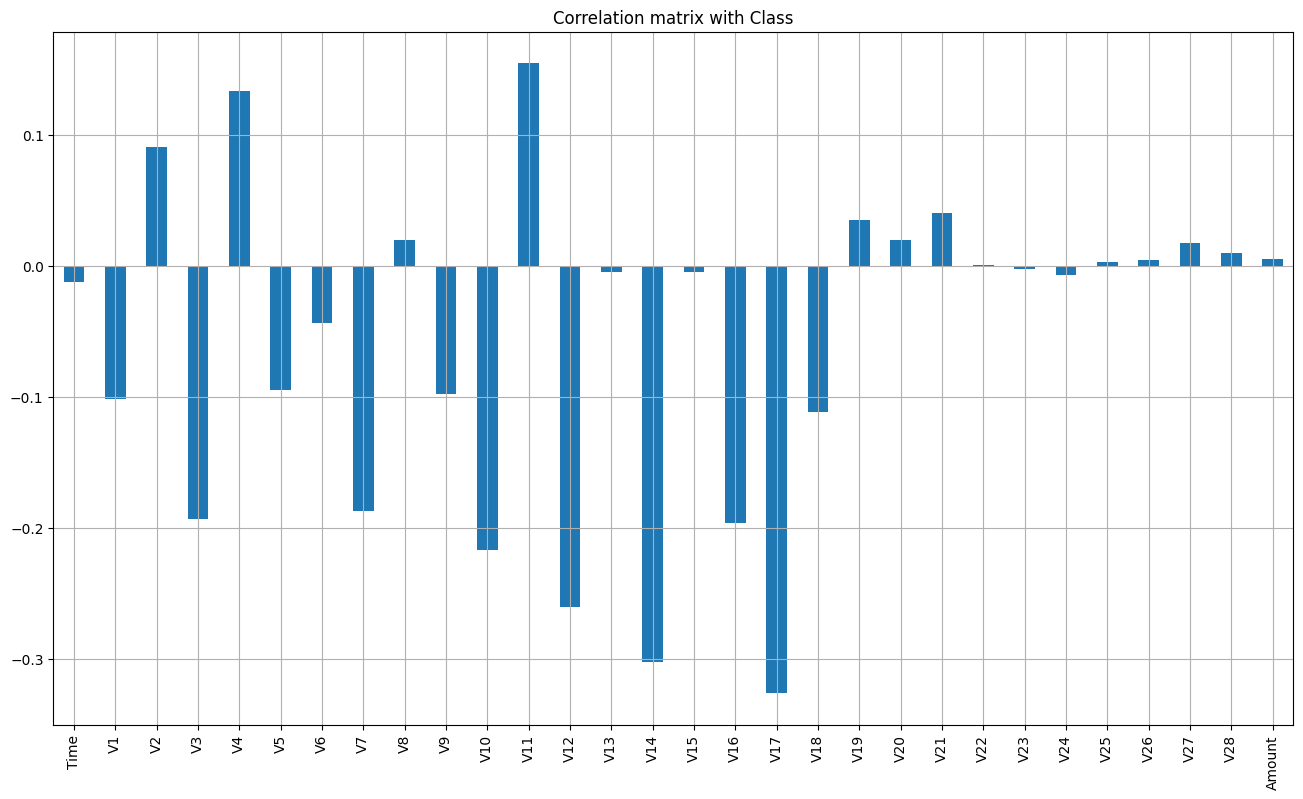

In [21]:
newdf.corrwith(df['Class']).plot.bar(
    figsize=(16,9), title = "Correlation matrix with Class", grid = True
)
plt.show()

In [22]:
corr = df.corr()

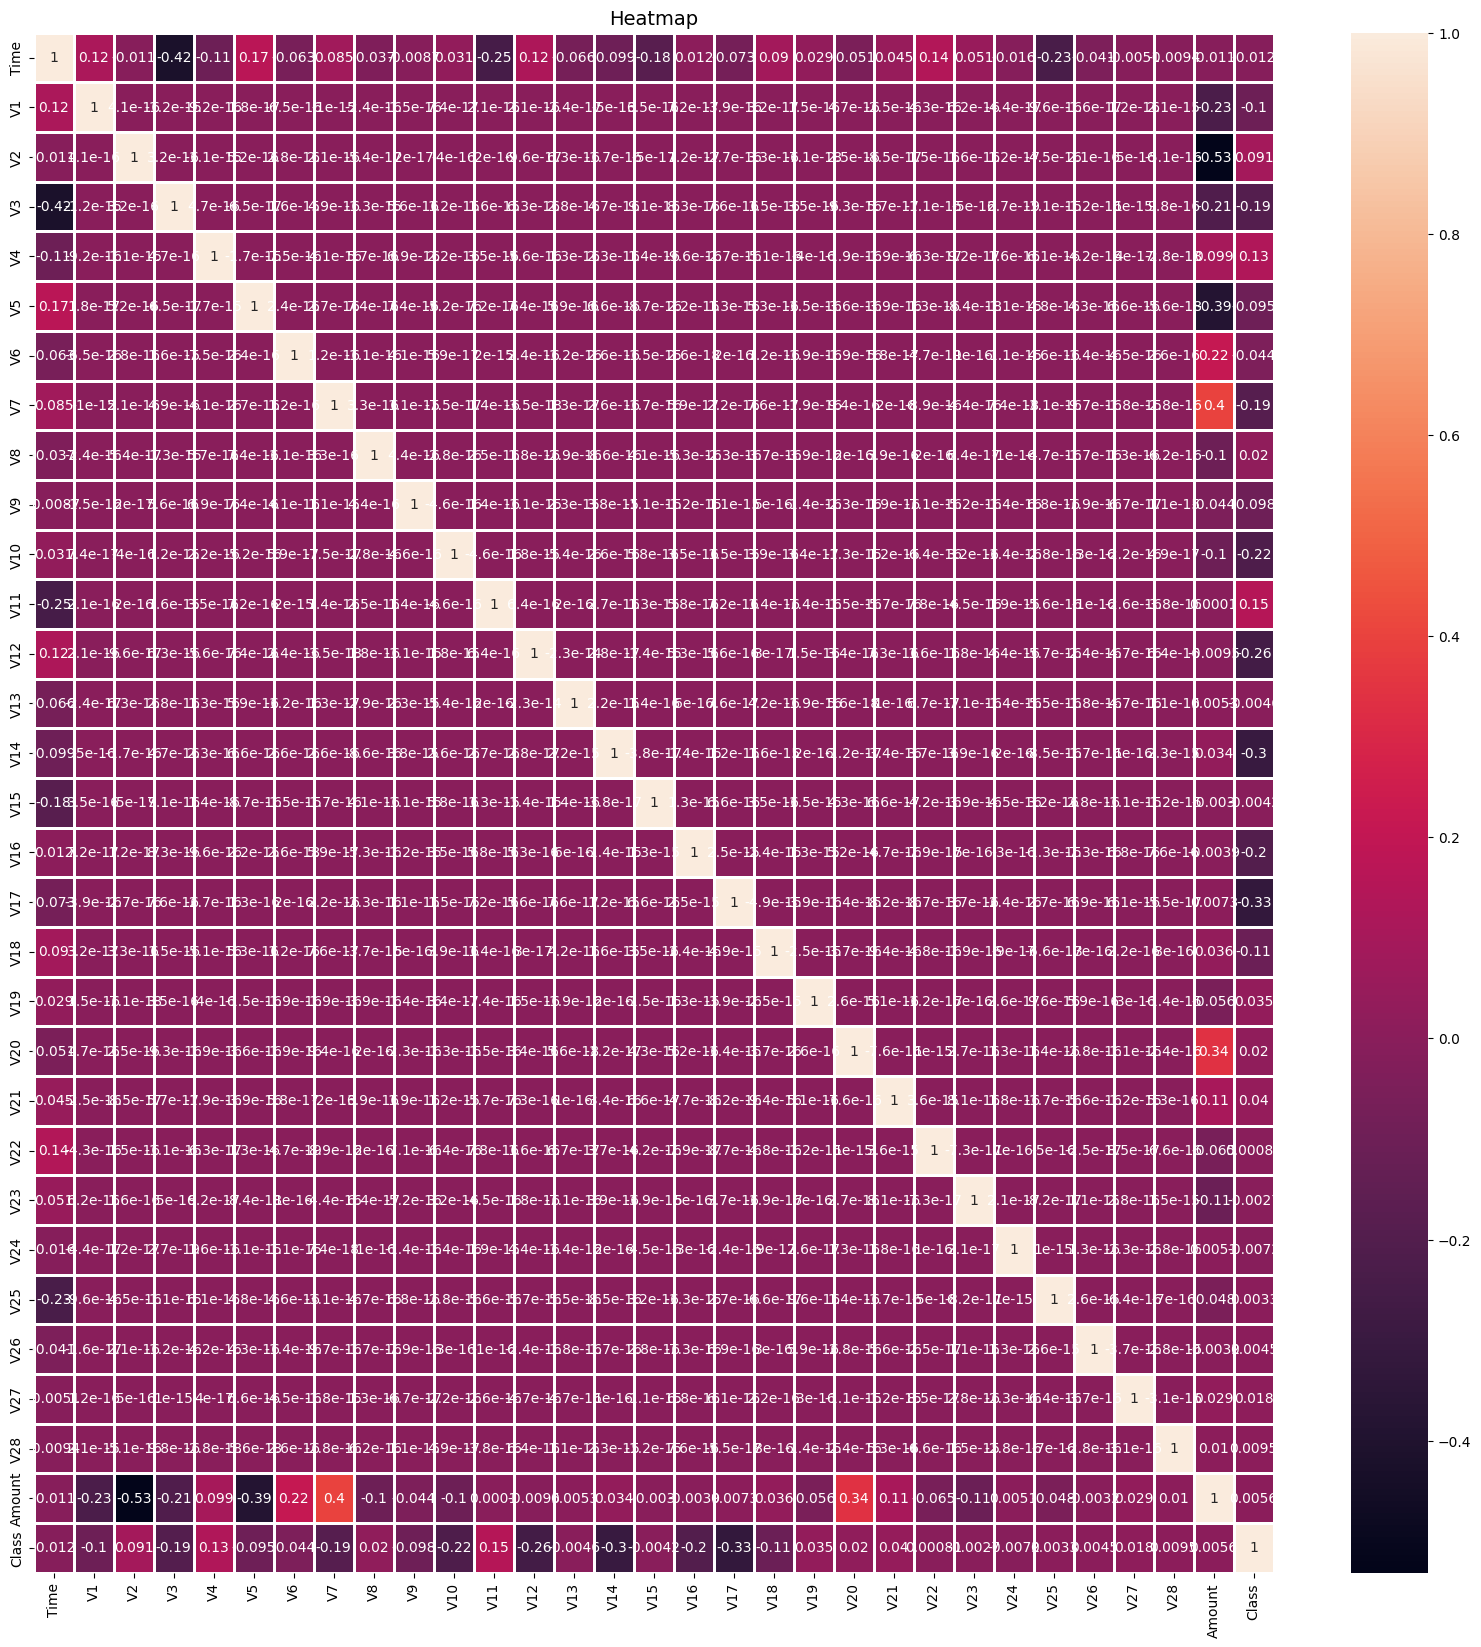

In [23]:
#Heatmap
plt.figure(figsize = (20,20))
ax = sns.heatmap(data = df.corr(), annot = True, linewidths = 2)
plt.title("Heatmap", font = 'sans serif', fontsize = 14, color ='black')
plt.show()

### Splitting the dataset into train and test set

In [24]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
x= df.drop(columns = 'Class')

In [26]:
y = df['Class']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [28]:
x_train.shape

(227845, 30)

In [29]:
x_test.shape

(56962, 30)

In [30]:
y_train.shape

(227845,)

In [31]:
y_test.shape

(56962,)

### Feature Scaling

In [32]:
sc = StandardScaler()

In [33]:
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [34]:
scaled_x_train

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

In [35]:
scaled_x_test

array([[ 0.65238668, -0.16686457,  0.64154241, ...,  0.27172397,
         0.50280513, -0.19606009],
       [ 1.31372573, -0.18035885,  0.56586861, ...,  0.19283776,
         0.54777109, -0.34934352],
       [ 1.21343225, -0.82732765, -1.45828848, ...,  0.7146577 ,
         1.36386022,  0.02971246],
       ...,
       [ 0.89086789,  0.57407801, -1.38701874, ..., -0.5986488 ,
        -0.02294377,  1.99397392],
       [ 1.39073528,  1.05455377,  0.17341371, ..., -0.2555804 ,
        -0.19207626, -0.34543281],
       [ 1.22637946,  1.20109412, -0.80279701, ...,  0.01953937,
        -0.16055905, -0.2968514 ]])

## Section 2: Model Building

### 1) Logistic Regression

In [36]:
classifier_lr = LogisticRegression(random_state=0)

In [37]:
classifier_lr.fit(scaled_x_train,y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier_lr.predict(scaled_x_test)

In [39]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

99.91924440855307


In [40]:
confusion_matrix(y_test,y_pred)

array([[56852,     9],
       [   37,    64]])

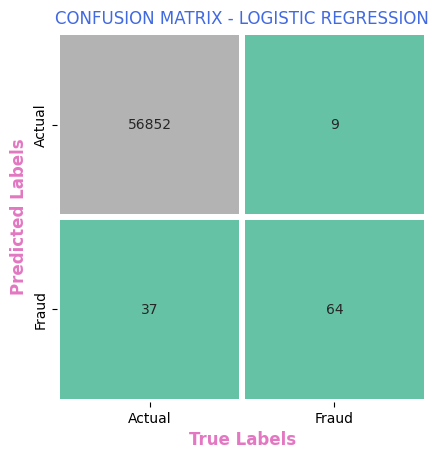

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt = "d",
            linewidth = 3, cbar = False, xticklabels = ['Actual', 'Fraud'],
            yticklabels = ['Actual','Fraud'], square = True)
plt.title('CONFUSION MATRIX - LOGISTIC REGRESSION', font = 'sans serif', fontsize = '12', color = 'royalblue')
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.show()

### 2) Random Forest Classifier

In [42]:
classifier_rf = RandomForestClassifier(random_state=0)

In [43]:
classifier_rf.fit(scaled_x_train,y_train)

RandomForestClassifier(random_state=0)

In [44]:
y_pred = classifier_rf.predict(scaled_x_test)

In [45]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

99.94908886626172


In [46]:
confusion_matrix(y_test,y_pred)

array([[56854,     7],
       [   22,    79]])

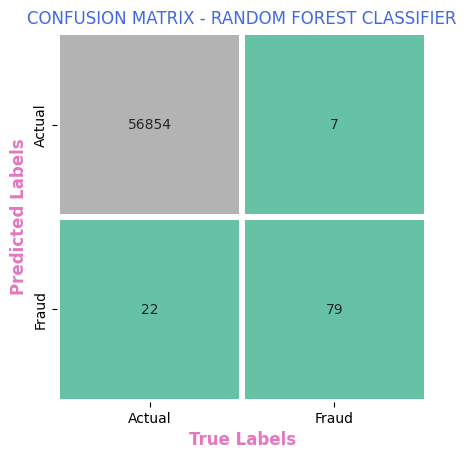

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt = "d",
            linewidth = 3, cbar = False, xticklabels = ['Actual', 'Fraud'],
            yticklabels = ['Actual','Fraud'], square = True)
plt.title('CONFUSION MATRIX - RANDOM FOREST CLASSIFIER', font = 'sans serif', fontsize = '12', color = 'royalblue')
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.show()

### 3) XGBoost Classifier

In [48]:
classifier_xgb = XGBClassifier(random_state=0)

In [49]:
classifier_xgb.fit(scaled_x_train,y_train)
y_pred = classifier_xgb.predict(scaled_x_test)

In [50]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

99.95435553526913


In [51]:
confusion_matrix(y_test,y_pred)

array([[56854,     7],
       [   19,    82]])

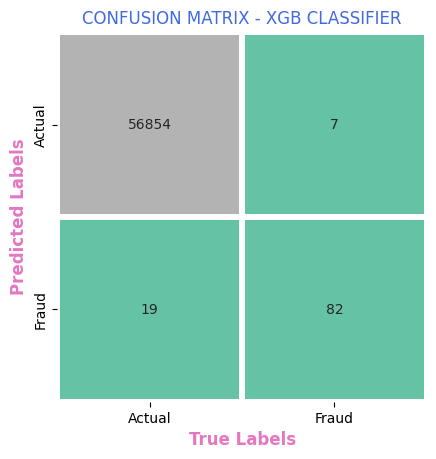

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt = "d",
            linewidth = 3, cbar = False, xticklabels = ['Actual', 'Fraud'],
            yticklabels = ['Actual','Fraud'], square = True)
plt.title('CONFUSION MATRIX - XGB CLASSIFIER', font = 'sans serif', fontsize = '12', color = 'royalblue')
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.show()

Out of the three models, XGB Classifier is performing slightly better than Random Forest Algorithm. We will choose XGB as our final model to predict single transactions.

## Section 3: Final Model (XGB Classifier)

In [54]:
classifier = XGBClassifier(random_state=0)
classifier.fit(scaled_x_train,y_train)
y_pred = classifier.predict(scaled_x_test)

In [55]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

99.95435553526913


In [56]:
confusion_matrix(y_test,y_pred)

array([[56854,     7],
       [   19,    82]])

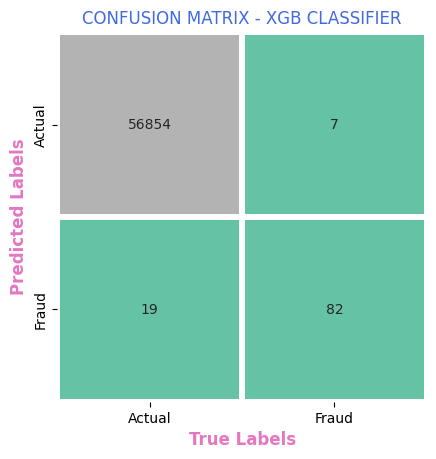

In [57]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt = "d",
            linewidth = 3, cbar = False, xticklabels = ['Actual', 'Fraud'],
            yticklabels = ['Actual','Fraud'], square = True)
plt.title('CONFUSION MATRIX - XGB CLASSIFIER', font = 'sans serif', fontsize = '12', color = 'royalblue')
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.show()

### Section 4: Predicting a single observation

In [58]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
df.shape

(284807, 31)

In [60]:
single_obs = [[0.0, -1.359807134, -0.072781173, 2.536346738, 1.378155224,	-0.33832077,	0.462387778,	0.239598554,
               0.098697901, 0.36378697,	0.090794172,	-0.551599533,	-0.617800856,	-0.991389847,	-0.311169354,	1.468176972,	-0.470400525,
               0.207971242,	0.02579058,	0.40399296,	0.251412098,	-0.018306778,	0.277837576,	-0.11047391,	0.066928075,
               0.128539358,	-0.189114844,	0.133558377,	-0.021053053,	149.62]]

In [61]:
#Model Prediction - Not a fradulent transaction
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])